Peak Interaction Periods:


<Figure size 1000x600 with 0 Axes>

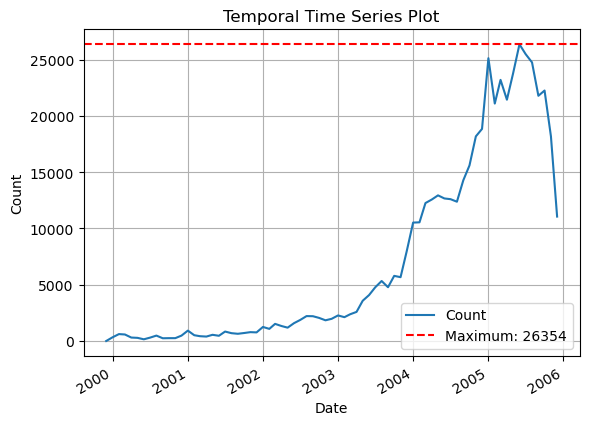

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dfcustomerengagement = pd.read_csv(r'topic4_edge_list_10000_customers.csv')

dftrendingenres = pd.read_csv(r'topic4_node_list_genre_10000_customers.csv')

dfanalysis= pd.merge(dfcustomerengagement, dftrendingenres, left_on='Target', right_on='Label', how='left')

dfanalysis['Date'] = pd.to_datetime(dfanalysis['Date'])
dfanalysis

dfanalysis['Year'] = dfanalysis['Date'].dt.year
dfanalysis['Month'] = dfanalysis['Date'].dt.month
peakcustomerengagement = dfanalysis.groupby(['Year', 'Month']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print("Peak Interaction Periods:")
# peakcustomerengagement.to_csv('peakcustomerengagement.csv')
peakcustomerengagement

year_month_counts = peakcustomerengagement
year_month_counts['Date'] = pd.to_datetime(year_month_counts[['Year', 'Month']].assign(day=1))

year_month_counts.set_index('Date', inplace=True)

year_month_counts.drop(['Year', 'Month'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
year_month_counts.plot()
plt.title('Temporal Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
peak_value = year_month_counts['Count'].max()

plt.axhline(y=peak_value, color='r', linestyle='--', label=f'Maximum: {peak_value}')
plt.legend()
plt.savefig('Peak interaction.png')
plt.show()

In [2]:
df1 = peakcustomerengagement

dfcustomerengagement = pd.read_csv(r'topic4_edge_list_10000_customers.csv')
dftrendingenres = pd.read_csv(r'topic4_node_list_genre_10000_customers.csv')
df2= pd.merge(dfcustomerengagement, dftrendingenres, left_on='Target', right_on='Label', how='left')

df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

merged_df = pd.merge(df1, df2, on='Date')

genres_stacked = merged_df['MovieGenre'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)

merged_df = merged_df.drop('MovieGenre', axis=1).join(genres_stacked.rename('Genre'))

genre_counts = merged_df.groupby(['Year', 'Month', 'Genre']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
genre_counts.to_csv('genre_counts.csv')
genre_counts.head(10)

,Year,Month,Genre,Count
1032,2005,3,Drama,524
1104,2005,6,Drama,518
1029,2005,3,Comedy,460
1224,2005,11,Drama,457
1128,2005,7,Drama,454
1153,2005,8,Drama,432
1221,2005,11,Comedy,404
1009,2005,2,Drama,397
1101,2005,6,Comedy,376
1150,2005,8,Comedy,357
